Single Layer Perceptron

In [31]:
def step_activation_func(weighted_sum):
    if weighted_sum > threshold:
        return 1
    else:
        return 0

def Perceptron_Single():
    weighted_sum = 0
    for i, (x, w) in enumerate(zip(X_input, W_weights), start = 1):
        product = x * w
        weighted_sum += product
        print(f"Step {i}: x = {x}, w = {w}, x*w = {product:.3f}, cumulative sum = {weighted_sum:.3f}")
    
    print(f"\nFinal weighted sum = {weighted_sum:.3f}")
    print(f"Threshold = {threshold}")
    output = step_activation_func(weighted_sum)
    print(f"Final Perceptron output = {output}")
    return output

X_input  = [0.3, 0.5, 0.6, 0.8]
W_weights = [0.6, 0.1, 0.7, 0.3]
threshold = 0.4
output = Perceptron_Single()

Step 1: x = 0.3, w = 0.6, x*w = 0.180, cumulative sum = 0.180
Step 2: x = 0.5, w = 0.1, x*w = 0.050, cumulative sum = 0.230
Step 3: x = 0.6, w = 0.7, x*w = 0.420, cumulative sum = 0.650
Step 4: x = 0.8, w = 0.3, x*w = 0.240, cumulative sum = 0.890

Final weighted sum = 0.890
Threshold = 0.4
Final Perceptron output = 1


Different Activation Functions
1. Activation Functions
2. Activation Functions for Hidden Layers
3. Activation Functions for Output Layers

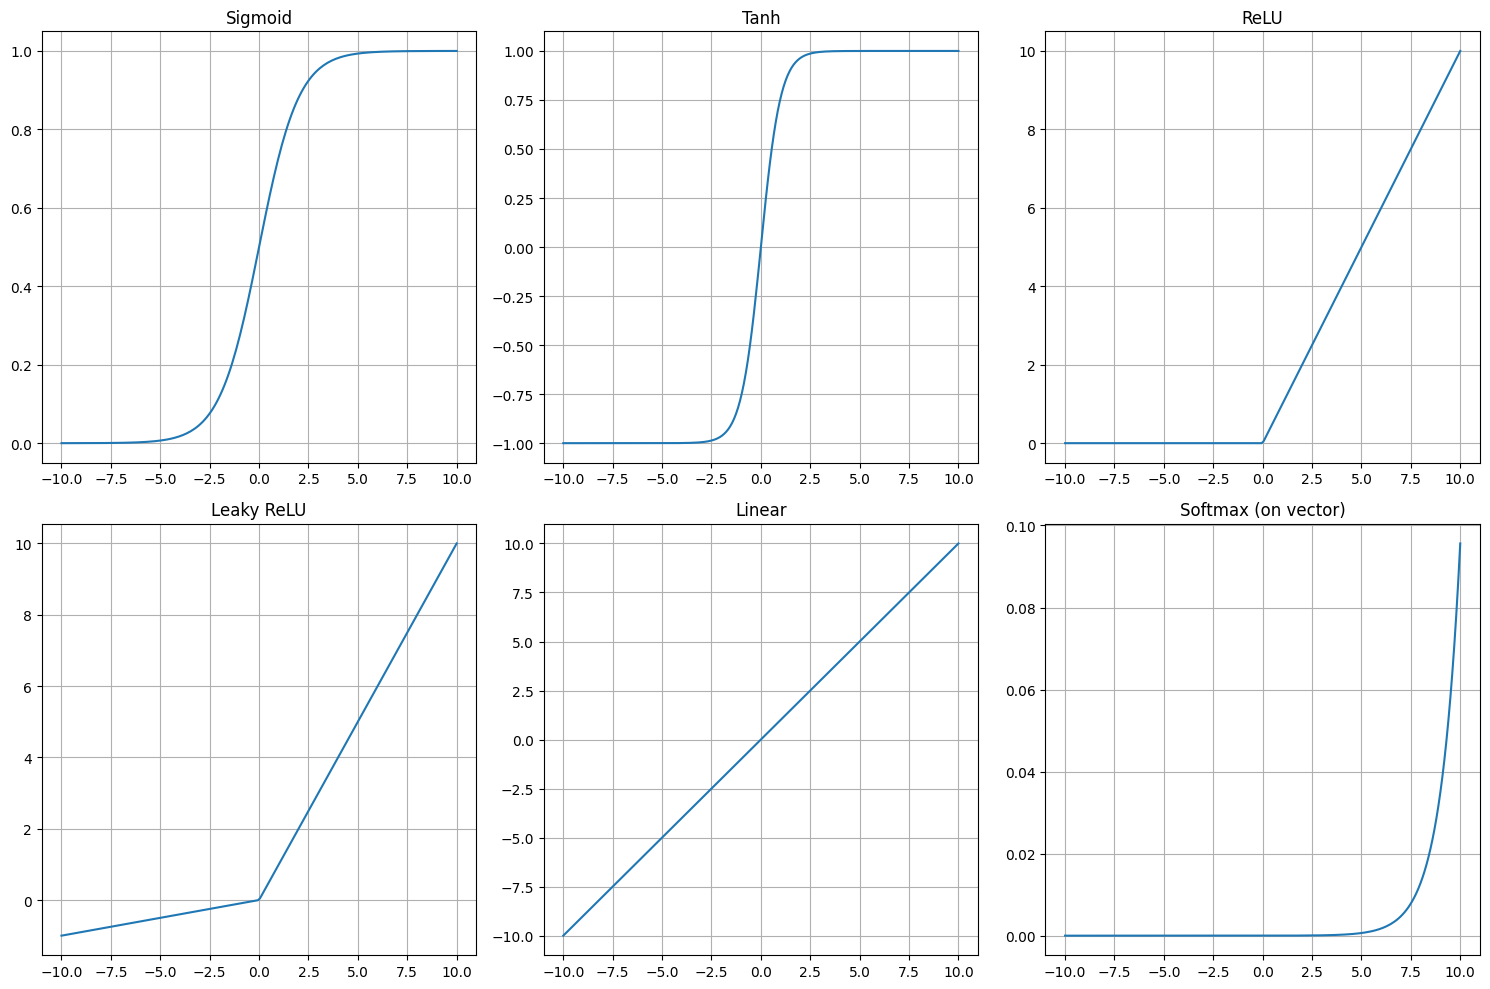

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.where(x > 0, x, 0.1 * x) #if X > 0, return x else 0.1 * x

def linear(x):
    return x

def softmax(x):
    ex = np.exp(x - np.max(x)) #numerical stability trick which avoids overflow errors
    return ex / ex.sum(axis = 0) #dividing exponentiated value by sum of the exp values to obtain probabilities
    
X = np.linspace(-10, 10, 200)

plt.figure(figsize=(15, 10))

activations = {
    'Sigmoid': sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'Leaky ReLU': leaky_relu,
    'Linear': linear,
    'Softmax (on vector)': lambda x: softmax(np.array([x1 for x1 in x])) #for plotting purpose
}

for i, (name, func) in enumerate(activations.items()):
    plt.subplot(2, 3, i+1)
    Y = func(X)
    plt.plot(X, Y), plt.title(name), plt.grid()

plt.tight_layout()
plt.show()

Perceptron For Binary Classification

In [34]:
class Perceptron:
    def __init__(self, input_len, learning_rate=0.1, epochs=1000):
        self.weights = np.zeros(input_len + 1)
        self.learningRate = learning_rate
        self.epochs = epochs
    
    def activation(self, x):
        return sigmoid(x)
    
    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return 1 if self.activation(z) >= 0.5 else 0
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights[1:]) + self.weights[0]
                output = self.activation(z)
                error = target - output
                self.weights[1:] += self.learningRate * error * xi
                self.weights[0] += self.learningRate * error

AND Gate

In [35]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])

model = Perceptron(input_len=2)
model.train(X, y)

print("\nPredictions for AND gate: ")
for xi in X:
    print(f"Input: {xi} => Predicted: {model.predict(xi)}")


Predictions for AND gate: 
Input: [0 0] => Predicted: 0
Input: [0 1] => Predicted: 0
Input: [1 0] => Predicted: 0
Input: [1 1] => Predicted: 1


OR Gate

In [36]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 1])

model = Perceptron(input_len=2)
model.train(X, y)

print("\nPredictions for AND gate: ")
for xi in X:
    print(f"Input: {xi} => Predicted: {model.predict(xi)}")


Predictions for AND gate: 
Input: [0 0] => Predicted: 0
Input: [0 1] => Predicted: 1
Input: [1 0] => Predicted: 1
Input: [1 1] => Predicted: 1


NOT Gate

In [38]:
X = np.array([[0], [1]])
y = np.array([1, 0])

model = Perceptron(input_len=1)
model.train(X, y)

print("\nPredictions for AND gate: ")
for xi in X:
    print(f"Input: {xi} => Predicted: {model.predict(xi)}")


Predictions for AND gate: 
Input: [0] => Predicted: 1
Input: [1] => Predicted: 0


NAND Gate

In [39]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([1, 1, 1, 0])

model = Perceptron(input_len=2)
model.train(X, y)

print("\nPredictions for AND gate: ")
for xi in X:
    print(f"Input: {xi} => Predicted: {model.predict(xi)}")


Predictions for AND gate: 
Input: [0 0] => Predicted: 1
Input: [0 1] => Predicted: 1
Input: [1 0] => Predicted: 1
Input: [1 1] => Predicted: 0


NOR Gate

In [40]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([1, 0, 0, 0])

model = Perceptron(input_len=2)
model.train(X, y)

print("\nPredictions for AND gate: ")
for xi in X:
    print(f"Input: {xi} => Predicted: {model.predict(xi)}")


Predictions for AND gate: 
Input: [0 0] => Predicted: 1
Input: [0 1] => Predicted: 0
Input: [1 0] => Predicted: 0
Input: [1 1] => Predicted: 0


Double Moon Classification Experiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import seaborn as sb

class DoubleMoonExpt:
    def __init__(self, r=10, w=6, d=1):
        '''Initialize the double moon classification
        Parameters:
        r: radius of each moon
        w: width of each moon
        d: vertical separation distance'''
        self.r = r
        self.w = w
        self.d = d
    
    def generate_points(self, n_points, region='A'):
        '''Random points generation within moon region'''
        points = []
        np.random.seed(42)
        while len(points) < n_points:
            if region == 'A':
                x = np.random.uniform(-self.r, self.r)
                y_center = np.sqrt(self.r**2 - x**2)
                y = np.random.uniform(y_center - self.w/2, y_center + self.w/2)

                if y >= 0 and y <= y_center + self.w/2:
                    points.append([x, y])
            
            else: #Region B
                x = np.random.uniform(0, 2*self.r) #center at the +ve radius of the above circle, displaced by d distance
                y_center = -np.sqrt(self.r**2 - (x - self.r)**2) - self.d
                y = np.random.uniform(y_center - self.w/2, y_center + self.w/2)

                if y <= 0 - self.d and y >= y_center - self.w/2:
                    points.append([x, y])
        return np.array(points)
    
def generate_dataset(self, n_train=1000, n_test=2000):
    '''These datasets are for training and testing'''
    train_A = self.generate_points(n_train//2, 'A')
    train_B = self.generate_points(n_train//2, 'B')

    x_train = np.vstack([train_A, train_B])
    y_train = np.hstack([np.ones(len(train_A)), np.zeros(len(train_B))])

    test_A = self.generate_points(n_test//2, 'A')
    test_B = self.generate_points(n_test//2, 'B')

    x_test = np.vstack([test_A, test_B])
    y_test = np.hstack([np.ones(len(test_A)), np.zeros(len(test_B))])

    train_idx = np.random.permutation(len(x_train))
    test_idx = np.random.permutation(len(x_test))

    return (x_train[train_idx], y_train[train_idx], x_test[test_idx], y_test[train_idx])

def train(self, x_train, y_train, max_itr=1000, learningRate=0.1):
    perceptron = Perceptron(max_itr, learningRate, random_state=42, shuffle=True)
    errors = []
    n_epochs = min(50, max_itr) #Limit to 50 epochs for visualization

    for epoch in range(n_epochs):
        perceptron.partial_fit(x_train, y_train, classes=[0, 1]) #partial fit for one epoch
        #calculate training error
        y_pred = perceptron.predict(x_train)
        error = np.mean(y_pred != y_train)
        errors.append(error)
        #If converged, stop
        if error == 0:
            print(f"Converged at epoch {epoch + 1}")
            break
    return perceptron, errors

def plot_results(self, x_train, y_train, x_test, y_test, perceptron, errors):
    '''Plotting learning curve and decision boundary'''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    #Learning Curve
    ax1.plot(range(1, len(errors) + 1), errors, 'b-', linewidth=2, marker='o')
    ax1.set_xlabel('Epoch'), ax1.set_ylabel('Training Error Rate')
    ax1.set_title(f'Learning curve (d = {self.d})')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, max(errors) * 1.1)

    #Decision Boundary and Test Points
    #Create mesh
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    #predict on mesh
    mesh_pts = np.column_stack([xx.ravel(), yy.ravel()])
    z = perceptron.predict(mesh_pts)
    z = z.reshape(xx.shape)

    
